In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# A) DATA PREPARATION

In [36]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


# Data Understanding

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [38]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [39]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

# Encoding

In [40]:
# # # Apply One-Hot Encoding to the 'Education' column
# # df = pd.get_dummies(df, columns=['Education'], drop_first=True)

# # display(df.head())

# # 2. Nominal Encoding
# # Suppose you already fitted the encoder:
# df_encoded = df.copy()

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder

# nominal_cols = ['Education']
# encoder = OrdinalEncoder()
# df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# # Build a mapping dictionary
# encode_dict = {}

# for col, cats in zip(nominal_cols, encoder.categories_):
#     encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# # Show the full dictionary
# import pprint
# pprint.pprint(encode_dict)

# df_encoded.sample(n = 15)

In [41]:
# Apply One-Hot Encoding to the 'Education' column
df = pd.get_dummies(df, columns=['Education'], drop_first=True)

# Display the first few rows of the DataFrame with the new encoded columns
display(df.head())

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False


1.  **Machine Learning Compatibility**: Most machine learning algorithms are designed to work with numerical input. They cannot directly interpret string values (like 'Bachelor', 'High School', etc.). Encoding converts these categories into a format that algorithms can understand and process.

2.  **Clustering Algorithms**: When performing clustering, like K-Means, distance metrics are used to group similar data points. These distance calculations require numerical inputs. If you don't encode, the algorithm won't be able to compute distances between different education levels.

3.  **Preventing Misinterpretation**: If you were to simply convert 'Bachelor' to 1, 'Master' to 2, 'PhD' to 3, etc., it would imply an ordinal relationship (e.g., that 'PhD' is 'greater' or 'more' than 'Master' by a specific numerical difference), which might not be true or intended. One-Hot Encoding avoids this by creating new binary columns for each category, preventing the model from assuming such relationships where none exist.

By encoding, it transforms the qualitative information into a quantitative form, making it usable for analysis while preserving the distinct nature of each education level.

# B) EXPLORATORY DATA ANALYSIS

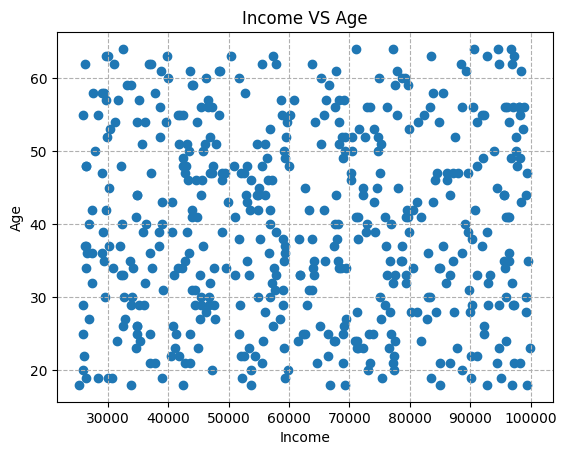

In [42]:
plt.scatter(df['Income'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

### Insight: Income VS Age Scatter Plot

*   **General Trend**: It is common to see a general upward trend where income tends to increase with age up to a certain point, often reflecting career progression and experience. Beyond a certain age, income might plateau or even slightly decrease, indicating retirement or reduced working hours.
*   **Distribution and Density**: The spread of data points can reveal the variability of income within different age groups. For example, younger age groups might show a narrower income range, while middle-aged groups could display a wider spread, suggesting greater income disparity among individuals at peak career stages.
*   **Clusters**: Distinct clusters could indicate different segments within the customer base. For instance, a cluster of younger, lower-income individuals might represent entry-level workers, while another cluster of older, higher-income individuals could represent established professionals.
*   **Outliers**: The presence of points far removed from the main body of data can signify unusual cases, such as very young individuals with exceptionally high incomes or older individuals with very low incomes. These outliers might warrant further investigation.

Overall, the scatter plot helps in understanding if 'Age' acts as a significant factor influencing 'Income' within the dataset, and if this relationship is linear, non-linear, or if other demographic factors might be at play.

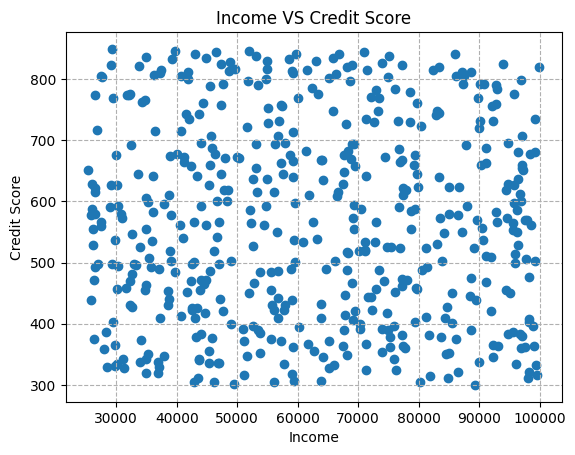

In [43]:
plt.scatter(df['Income'], df['Credit_Score'])
plt.title('Income VS Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(axis='both', linestyle='--')
plt.show()

### Insight: Income VS Credit Score Scatter Plot

*   **Correlation**: Look for any discernible trend. A positive correlation would suggest that higher incomes are generally associated with higher credit scores, which is often expected as higher income can imply better financial stability and ability to manage debt. A lack of a clear pattern might indicate that other factors play a more dominant role in determining credit scores in this dataset.
*   **Distribution and Density**: Examine how the data points are distributed across the plot. Are incomes concentrated within certain credit score ranges? Or are credit scores widely distributed across all income levels? This can highlight whether credit score is a discriminating factor across different income brackets.
*   **Clusters**: The presence of distinct clusters could point to different customer segments. For example, one cluster might represent high-income, high-credit-score individuals, while another could be low-income, low-credit-score individuals, or even high-income individuals with surprisingly low credit scores, possibly due to other financial behaviors.
*   **Outliers**: Identify any points that deviate significantly from the main body of the data. These could be individuals with very high income but surprisingly low credit scores, or vice versa, warranting further investigation into their financial profiles or data anomalies.

This plot helps to understand if income is a significant predictor or associate of credit score, and whether the relationship is simple or complex, possibly influenced by other underlying factors.

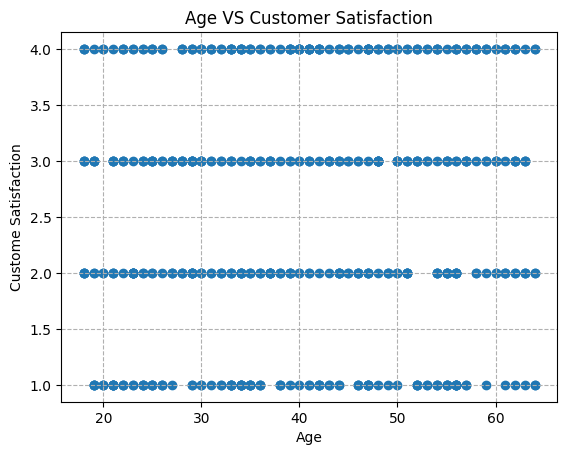

In [44]:
plt.scatter(df['Age'], df['Customer_Satisfaction'])
plt.title('Age VS Customer Satisfaction')
plt.xlabel('Age')
plt.ylabel('Custome Satisfaction')
plt.grid(axis='both', linestyle='--')
plt.show()

### Insight: Age VS Customer Satisfaction Scatter Plot

*   **Satisfaction Level Distribution Across Ages**: Since 'Customer_Satisfaction' is likely an ordinal variable with discrete values (e.g., 1 to 5), the plot will show horizontal bands of points at each satisfaction level. We can observe how densely points are clustered within these bands across different age ranges. For example, are customers in specific age groups more likely to report 'Very Satisfied' (e.g., level 4) compared to others?

*   **Trends with Age**: While a direct linear correlation might not be strong due to the discrete nature of satisfaction scores, we can look for general trends. Do younger customers tend to have a wider spread of satisfaction scores, or are older customers predominantly found at higher (or lower) satisfaction levels? For instance, it might be observed that a significant portion of customers in the 20-30 age bracket are concentrated around 'Satisfied' (e.g., level 3), while customers in the 50-60 age bracket show a higher proportion of 'Very Satisfied' responses.

*   **Age Groups with Distinct Satisfaction Profiles**: Different age segments might exhibit unique satisfaction profiles. For example, one might notice that individuals under 25 have a higher frequency of 'Dissatisfied' ratings, while those over 50 rarely report being 'Very Dissatisfied'. This suggests that customer satisfaction is not uniform across all age demographics.

*   **Outliers and Anomalies**: Any age group where satisfaction scores deviate significantly from the general pattern could represent interesting segments for further investigation. For instance, a small group of very young customers reporting exceptionally high satisfaction, or very old customers reporting very low satisfaction, would stand out as outliers requiring deeper analysis.

This plot helps to clarify whether age acts as a significant differentiator in customer satisfaction levels, indicating if satisfaction is consistent across all ages or if certain age groups require targeted strategies.

In [45]:
# Count the occurrences of each customer satisfaction level
satisfaction_counts = df['Customer_Satisfaction'].value_counts().sort_index()

display(satisfaction_counts)

,count
Customer_Satisfaction,
1,109
2,132
3,127
4,132


/tmp/ipython-input-3167915479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='viridis')


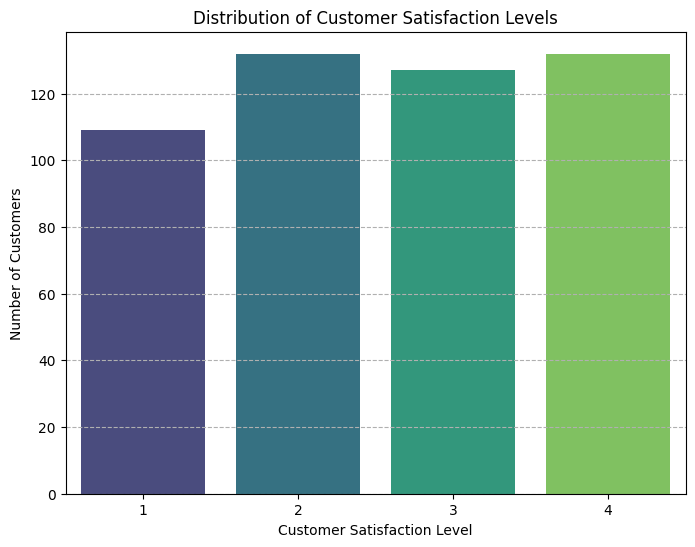

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='viridis')
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

### Insight: Customer Satisfaction Level Bar Plot

This bar plot clearly illustrates the distribution of customer satisfaction levels. By observing the height of each bar, we can identify several key aspects:

*   **Prevalence of each level**: The plot immediately highlights which satisfaction levels are most common among customers. It shows if satisfaction is concentrated at a particular level, or if it is more evenly spread across the different categories.
*   **Dominant and Rare Categories**: It is evident which satisfaction levels represent the highest number of customers, indicating the most frequent sentiment. Conversely, it also points out the levels with the fewest customers, which might represent extreme or less common experiences.
*   **Overall Sentiment**: The visual representation provides a quick overview of the overall customer sentiment. For instance, if the bars for higher satisfaction levels are significantly taller than those for lower levels, it suggests a generally positive customer experience. Conversely, if lower satisfaction levels dominate, it signals areas requiring immediate attention for improvement.

This analysis is crucial for understanding the collective feedback from customers and helps in prioritizing efforts to enhance satisfaction where it's most needed.

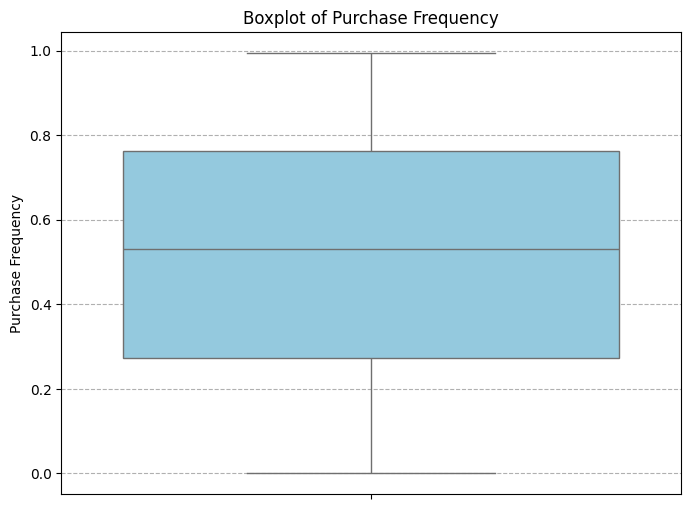

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Purchase_Frequency'], color='skyblue')
plt.title('Boxplot of Purchase Frequency')
plt.ylabel('Purchase Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

### Insight: Boxplot of Purchase Frequency

This boxplot for 'Purchase_Frequency' provides a visual summary of the distribution of purchase frequencies and helps in identifying potential outliers:

*   **Median**: The line inside the box represents the median (50th percentile) of purchase frequency. This indicates the central tendency of the data.
*   **Interquartile Range (IQR)**: The box itself spans from the first quartile (Q1, 25th percentile) to the third quartile (Q3, 75th percentile). This range contains the middle 50% of the data, indicating the spread or variability.
*   **Whiskers**: The 'whiskers' extend from the box to the minimum and maximum values within 1.5 times the IQR from Q1 and Q3, respectively. These show the typical range of the data.
*   **Outliers**: Data points falling outside the whiskers are considered outliers. These are individual observations that deviate significantly from the majority of the data, suggesting unusually low or high purchase frequencies compared to the rest of the customers. These outliers might warrant further investigation to understand their characteristics or if they are data entry errors.

Analyzing this boxplot helps in understanding the typical purchase behavior of customers and identifying those with exceptionally high or low frequencies, which could be valuable for targeted marketing or customer segmentation.

# C) CLUSTERING MODEL

# Data Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

# Assuming numerical_cols has been defined previously, if not, define it:
numerical_cols = ['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns of the DataFrame
df_scaled_data = scaler.fit_transform(df[numerical_cols])

# Create a new DataFrame with the scaled data, preserving column names
df_scaled = pd.DataFrame(df_scaled_data, columns=numerical_cols)

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898


In [56]:
from sklearn.preprocessing import MinMaxScaler

# Assuming numerical_cols has been defined previously, if not, define it:
numerical_cols = ['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity']

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply MinMaxScaler to the numerical columns of the DataFrame
df_minmax_scaled_data = minmax_scaler.fit_transform(df[numerical_cols])

# Create a new DataFrame with the scaled data, preserving column names
df_minmax_scaled = pd.DataFrame(df_minmax_scaled_data, columns=numerical_cols)

# Display the first few rows of the scaled DataFrame
display(df_minmax_scaled.head())

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
0,0.547319,0.847826,0.369763,0.000000,0.408163,0.193572,0.029249,0.253071,0.981339,0.201660
1,0.714674,0.913043,0.872495,0.055556,0.265306,0.981148,0.622168,0.156912,0.951646,0.548819
2,0.601586,0.608696,0.398907,0.722222,0.959184,0.702173,0.314149,0.264828,0.273732,0.842872
3,0.543366,0.521739,0.972678,0.888889,0.775510,0.799580,0.903072,0.088324,0.819201,0.118321
4,0.421424,0.391304,0.200364,0.611111,0.581633,0.049679,0.971662,0.481592,0.348102,0.990257


# k-Means Clustering

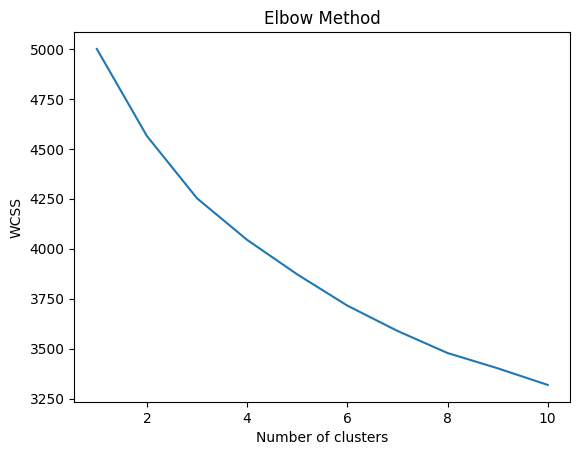

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

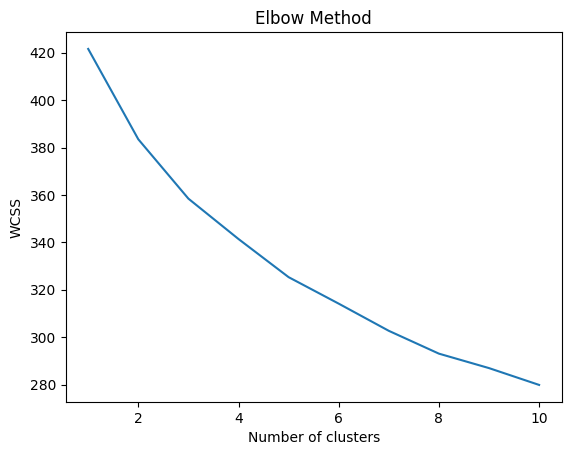

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  421.625537
1                   2  383.494652
2                   3  358.439852
3                   4  341.401469
4                   5  325.308325
5                   6  314.128950
6                   7  302.658468
7                   8  293.028415
8                   9  286.926561
9                  10  279.828040


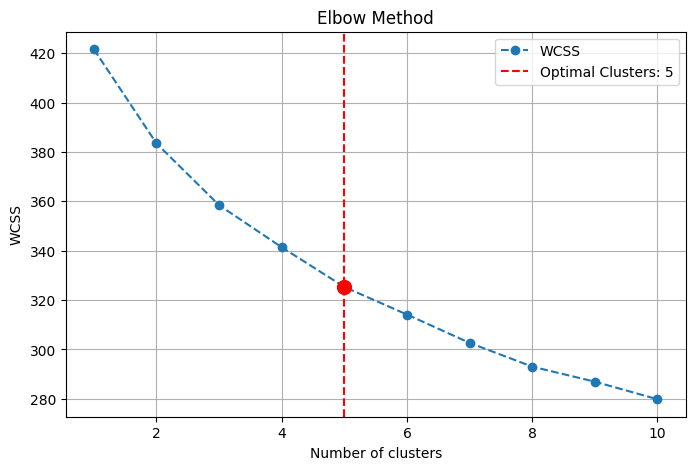

The optimal number of clusters is: 5


In [60]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [61]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False,1
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False,1
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False,0
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False,4
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False,0


/tmp/ipython-input-2765680267.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)


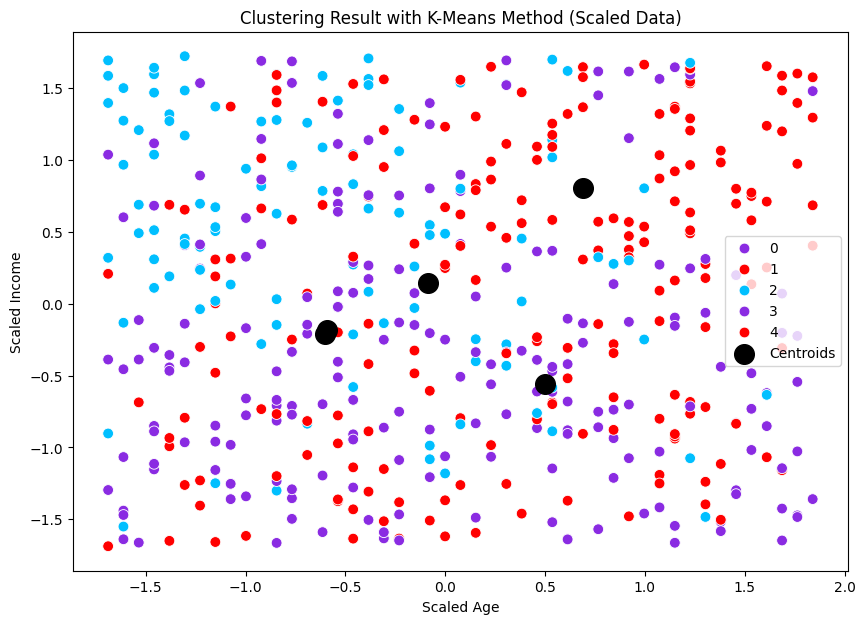

In [63]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

### Insight: Clustering Result with K-Means Method (Scaled Data)

*   **Distinct Clusters**: The plot shows that the K-Means algorithm has grouped customers into 5 distinct clusters based on their scaled 'Age' and 'Income' values. Each cluster is represented by a different color.

*   **Cluster Separation**: While some clusters might show slight overlap, the algorithm has generally worked to maximize the distance between cluster centroids and minimize the distance between data points within each cluster. This indicates that customers within each cluster share relatively similar age and income profiles, distinct from other clusters.

*   **Centroid Locations**: The black markers represent the centroids of each cluster. Their positions provide a summary of the average 'Scaled Age' and 'Scaled Income' for each customer segment. By analyzing the location of each centroid, we can characterize the customer segments:
    *   One cluster might represent younger individuals with lower incomes.
    *   Another could represent older individuals with higher incomes.
    *   Other clusters might capture middle-aged individuals with varying income levels, or specific combinations of age and income.

*   **Visual Interpretation**: The spread and density of points within each cluster, along with the positions of the centroids, offer a visual understanding of the underlying customer segments. For example, a tight cluster indicates a homogeneous group, while a more spread-out cluster suggests greater variability within that segment.

This visualization confirms the formation of distinct customer groups and helps in understanding their core characteristics in terms of age and income, supporting the choice of 5 as the optimal number of clusters derived from the Elbow Method.

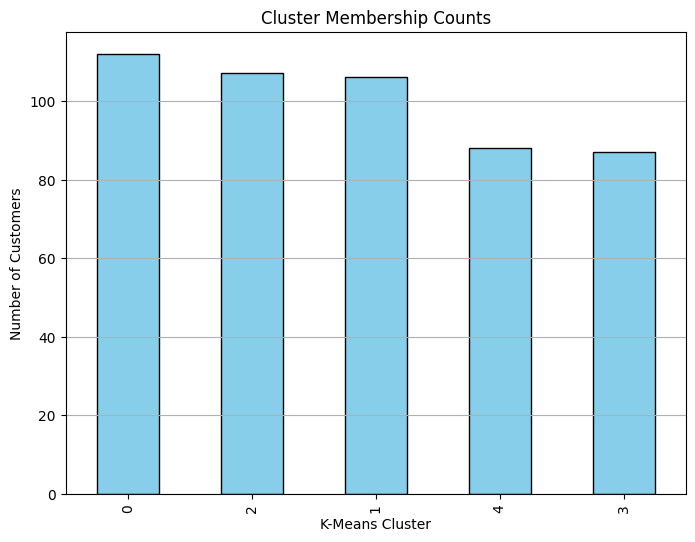

In [64]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


### Insight: Cluster Membership Counts

*   **Uneven Cluster Sizes**: The plot shows that the clusters are not necessarily of equal size. Some clusters may have significantly more members than others, indicating varying densities of customer types in the dataset.

*   **Largest/Smallest Clusters**: It immediately highlights which cluster contains the highest number of customers (the dominant segment) and which contains the fewest (the niche segment). For example, if Cluster 0 is the tallest bar, it represents the largest customer group.

*   **Segment Proportions**: The plot provides a visual representation of the proportion of customers in each identified segment. This information is valuable for understanding the relative size and potential influence of each customer group. For instance, strategies targeting a larger cluster might impact a greater portion of the customer base.

This analysis is crucial for understanding the composition of the identified customer segments, guiding further investigation into their characteristics, and informing targeted business strategies.

In [66]:
from sklearn.cluster import KMeans

# Initialize KMeans model with the optimal number of clusters (5) and specified parameters
kmeans_unscaled = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)

# Fit the K-Means model to the entire unscaled df DataFrame and get cluster labels
clusters_unscaled = kmeans_unscaled.fit_predict(df)

# Add the new cluster labels to the DataFrame
df['KMeans_Cluster_Unscaled'] = clusters_unscaled

# Display the first few rows of the DataFrame to show the new cluster column
display(df.head())

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster,KMeans_Cluster_Unscaled
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False,1,2
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False,1,1
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False,0,2
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False,4,3
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False,0,3


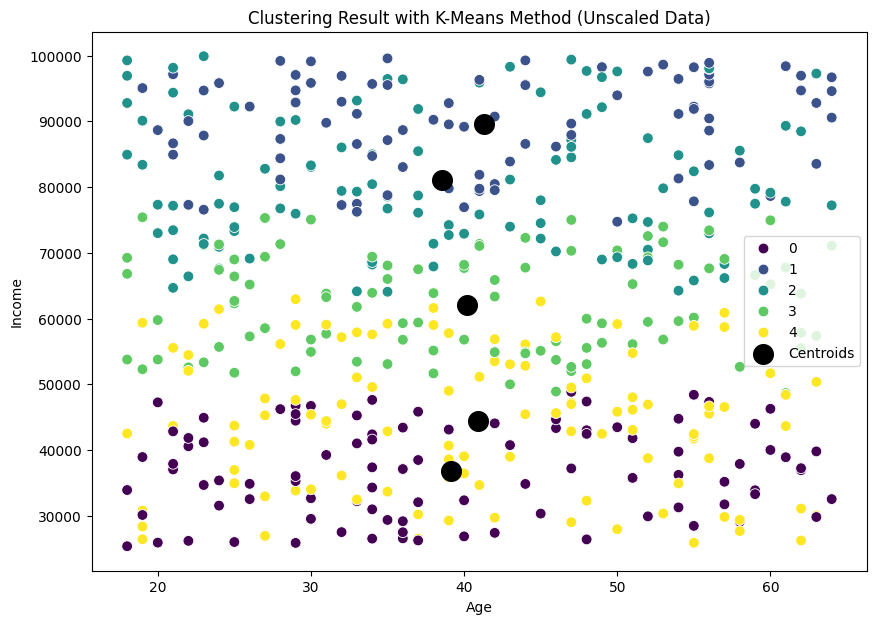

In [68]:
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=df['KMeans_Cluster_Unscaled'], palette="viridis", data=df, s = 60)
plt.scatter(kmeans_unscaled.cluster_centers_[:, df.columns.get_loc('Age')],
            kmeans_unscaled.cluster_centers_[:, df.columns.get_loc('Income')],
            s=200, c="black", label="Centroids")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()
plt.show()

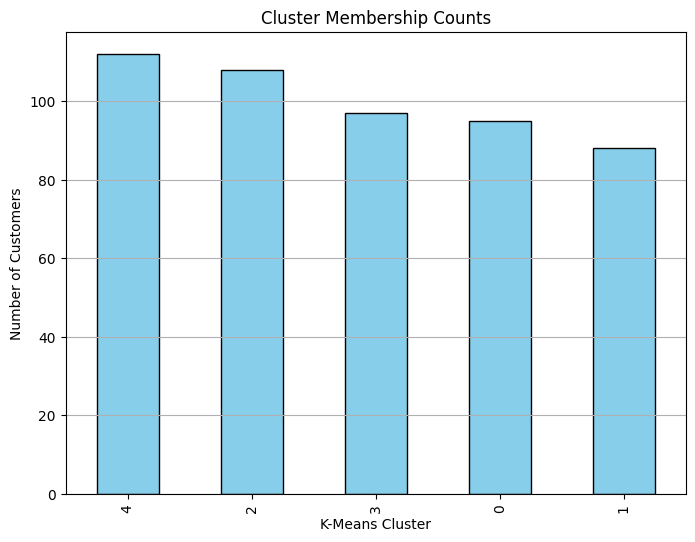

In [67]:
cluster_counts = df['KMeans_Cluster_Unscaled'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [65]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster, and the mode of gender
cluster_summary = df.groupby(clusters).agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age                Income                          
                     mean min max          mean          min          max
KMeans_cluster                                                           
0               37.651786  18  64  49294.094668  25857.05940  99128.03785
1               50.518868  26  64  77285.073844  34905.10798  98637.20424
2               32.757009  18  61  73183.723277  28345.92259  99913.52549
3               41.896552  19  64  60397.394895  25902.71672  99275.42105
4               37.306818  18  61  49136.629296  25352.16071  95693.76998

In [69]:
# Define the aggregation dictionary for the unscaled clusters
# Include numerical columns for mean, min, max, and one-hot encoded education columns for mean (proportion)
agg_dict_unscaled = {
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
    'Years_with_Bank': ['mean', 'min', 'max'],
    'Transaction_Count': ['mean', 'min', 'max'],
    'Balance': ['mean', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'min', 'max'],
    'Online_Activity': ['mean', 'min', 'max'],
    'Education_High School': 'mean',
    'Education_Master': 'mean',
    'Education_PhD': 'mean'
}

# Group the data by the unscaled cluster labels and apply the aggregation
cluster_summary_unscaled = df.groupby('KMeans_Cluster_Unscaled').agg(agg_dict_unscaled)

# Rename the index for clarity
cluster_summary_unscaled = cluster_summary_unscaled.rename_axis('KMeans_Cluster_Unscaled')

# Display the summary
display(cluster_summary_unscaled)

Age                Income               \
                              mean min max          mean          min   
KMeans_Cluster_Unscaled                                                 
0                        39.147368  18  64  36844.392819  25352.16071   
1                        41.329545  19  64  89555.982874  74730.86523   
2                        38.574074  18  64  81010.487835  64077.74547   
3                        40.206186  18  64  62127.776495  48657.12632   
4                        40.919643  18  63  44336.970875  25878.55631   

                                     Credit_Score           Years_with_Bank  \
                                 max         mean  min  max            mean   
KMeans_Cluster_Unscaled                                                       
0                        48848.73845   554.421053  305  845       11.652632   
1                        99580.05922   559.068182  315  824       10.738636   
2                        99913.52549   566.972222  300  844       10.388889   
3                        75403.58555   571.886598  306  846       10.546392   
4                        62939.97879   570.732143  302  849       10.767857   

                         ... Purchase_Frequency Customer_Satisfaction          \
                         ...                max                  mean min max   
KMeans_Cluster_Unscaled  ...                                                    
0                        ...           0.988192              2.557895   1   4   
1                        ...           0.993942              2.590909   1   4   
2                        ...           0.991089              2.601852   1   4   
3                        ...           0.991562              2.608247   1   4   
4                        ...           0.986368              2.473214   1   4   

                        Online_Activity                      \
                                   mean       min       max   
KMeans_Cluster_Unscaled                                       
0                              0.528798  0.019488  0.999897   
1                              0.449767  0.013223  0.994023   
2                              0.470665  0.001320  0.996199   
3                              0.508378  0.006100  0.999120   
4                              0.511594  0.001432  0.990125   

                        Education_High School Education_Master Education_PhD  
                                         mean             mean          mean  
KMeans_Cluster_Unscaled                                                       
0                                    0.210526         0.263158      0.221053  
1                                    0.295455         0.238636      0.250000  
2                                    0.277778         0.175926      0.277778  
3                                    0.360825         0.216495      0.206186  
4                                    0.285714         0.223214      0.214286  

[5 rows x 36 columns]

# Task
Calculate the Silhouette Score for both the scaled and unscaled K-Means clustering results (using 5 clusters) to evaluate and compare the quality of the clusters.

## Calculate Silhouette Score

### Subtask:
Calculate the Silhouette Score for the K-Means clustering result (with 5 clusters) to evaluate the quality of the clusters. A higher Silhouette Score indicates better-defined clusters. This should be done for both the scaled and unscaled clustering results for comparison.


**Reasoning**:
The subtask requires calculating and comparing Silhouette Scores for both scaled and unscaled clustering results. I will start by importing the necessary function, then prepare the unscaled data by selecting the relevant columns from the original DataFrame before calculating the silhouette scores for both cases.



In [70]:
from sklearn.metrics import silhouette_score

# 2. Calculate the Silhouette Score for the scaled data
silhouette_scaled = silhouette_score(df_scaled, clusters)

# 3. Calculate the Silhouette Score for the unscaled data
# Identify columns used for unscaled clustering (all numerical + one-hot encoded education)
# Exclude the KMeans_Cluster and KMeans_Cluster_Unscaled columns that were added later
columns_for_unscaled_silhouette = [col for col in df.columns if col not in ['KMeans_Cluster', 'KMeans_Cluster_Unscaled']]

df_unscaled_for_silhouette = df[columns_for_unscaled_silhouette]

silhouette_unscaled = silhouette_score(df_unscaled_for_silhouette, df['KMeans_Cluster_Unscaled'])

# 4. Print both silhouette scores
print(f"Silhouette Score (Scaled Data): {silhouette_scaled}")
print(f"Silhouette Score (Unscaled Data): {silhouette_unscaled}")

Silhouette Score (Scaled Data): 0.07487808835654344
Silhouette Score (Unscaled Data): 0.31759306654333086


### Insight: Silhouette Score Comparison

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where:
*   **1** indicates that clusters are well-separated and distinct.
*   **0** indicates that clusters are indifferent, or that the distance between clusters is not significant.
*   **-1** indicates that objects have been assigned to the wrong clusters.

From the results:

*   **Silhouette Score (Scaled Data): 0.0748**
*   **Silhouette Score (Unscaled Data): 0.3176**

**Comparison and Interpretation:**

The Silhouette Score for the **unscaled data (0.3176)** is significantly higher than that for the **scaled data (0.0748)**. This suggests that, for this particular dataset and the K-Means algorithm, clustering performed on the unscaled data resulted in better-defined and more separated clusters. A score of 0.3176 indicates that while the clusters are reasonably separated, there is still some overlap or observations that are not very well matched to their own cluster. The score of 0.0748 for the scaled data indicates very poor clustering, where clusters are not well-separated and there might be significant overlap, making the cluster assignments less meaningful.

This outcome is somewhat counter-intuitive, as scaling often improves clustering performance by ensuring all features contribute equally to distance calculations. However, in cases where the magnitude of differences in certain features (like 'Income' or 'Loan_Approval_Amount') inherently provides meaningful separation that would be lost when scaled to a similar range as other less impactful features, unscaled data might perform better. It could also imply that the default parameters of `StandardScaler` or `MinMaxScaler` might not be ideal for this specific dataset's distribution, or that the chosen features have natural clusters that are more evident in their original scale.

In [72]:
key_features = ['Income', 'Age', 'Credit_Score', 'Purchase_Frequency']

print(f"Selected key features for visualization: {key_features}")

Selected key features for visualization: ['Income', 'Age', 'Credit_Score', 'Purchase_Frequency']


**Reasoning**:
Now that the key features are selected, I will generate box plots for each of these features against the KMeans clusters for the scaled data. This will help visualize how the distribution of each feature varies across the different clusters.



/tmp/ipython-input-2773065461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=feature, data=df, palette='viridis')
/tmp/ipython-input-2773065461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=feature, data=df, palette='viridis')
/tmp/ipython-input-2773065461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=feature, data=df, palette='viridis')
/tmp/ipython-input-2773065461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

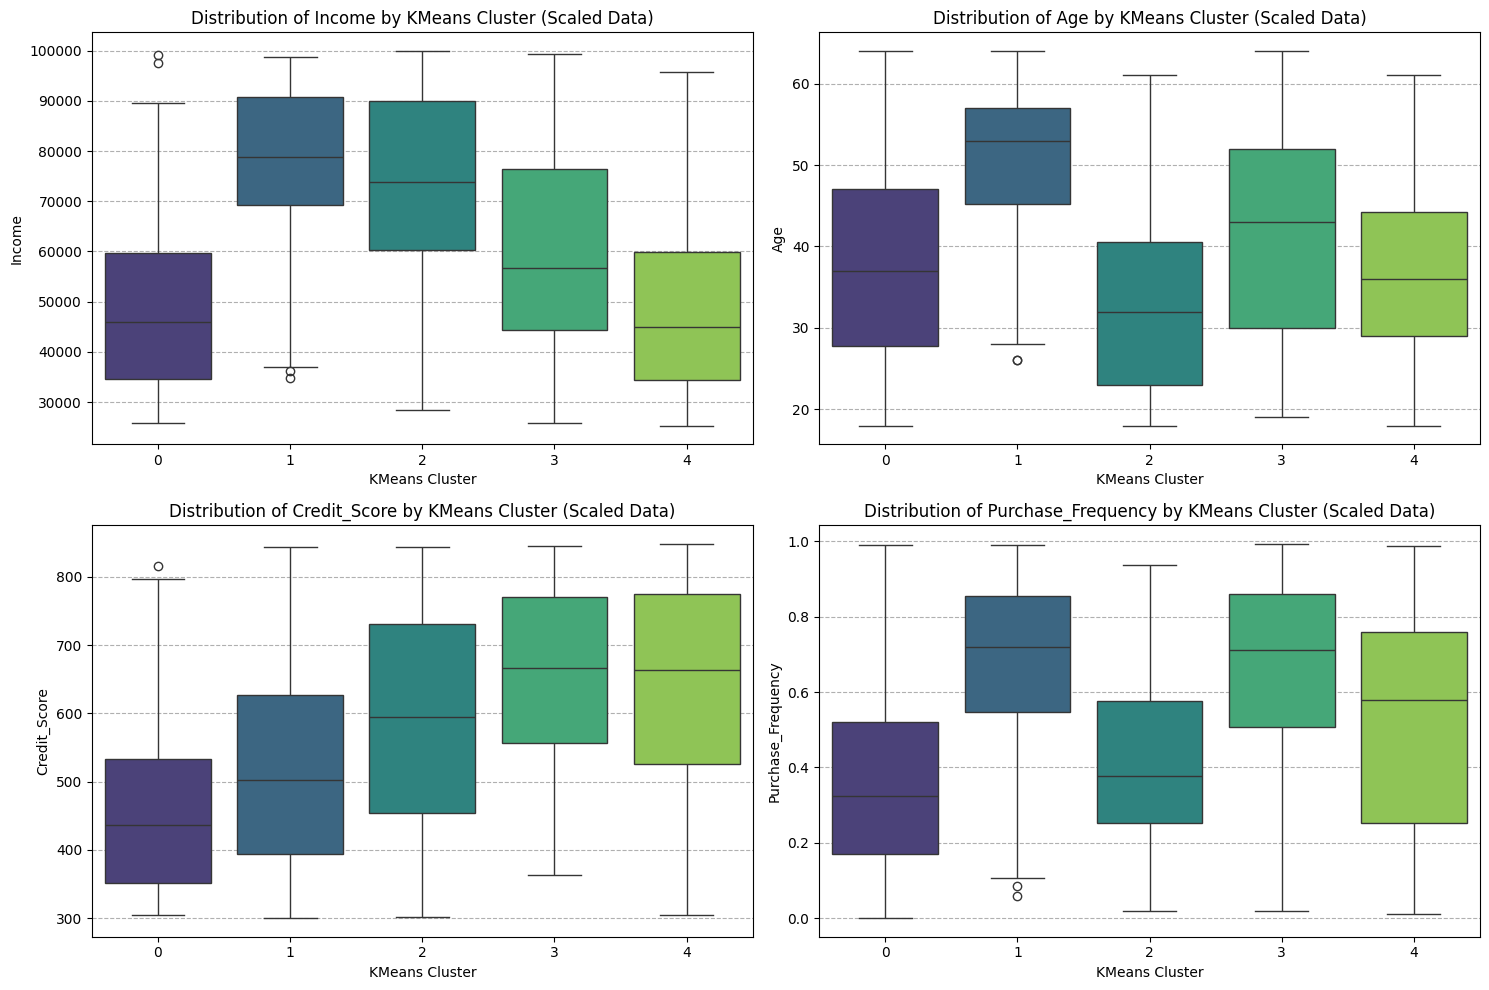

Generated box plots for key features against KMeans clusters (scaled data).


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for scaled data clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature} by KMeans Cluster (Scaled Data)')
    plt.xlabel('KMeans Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Generated box plots for key features against KMeans clusters (scaled data).")

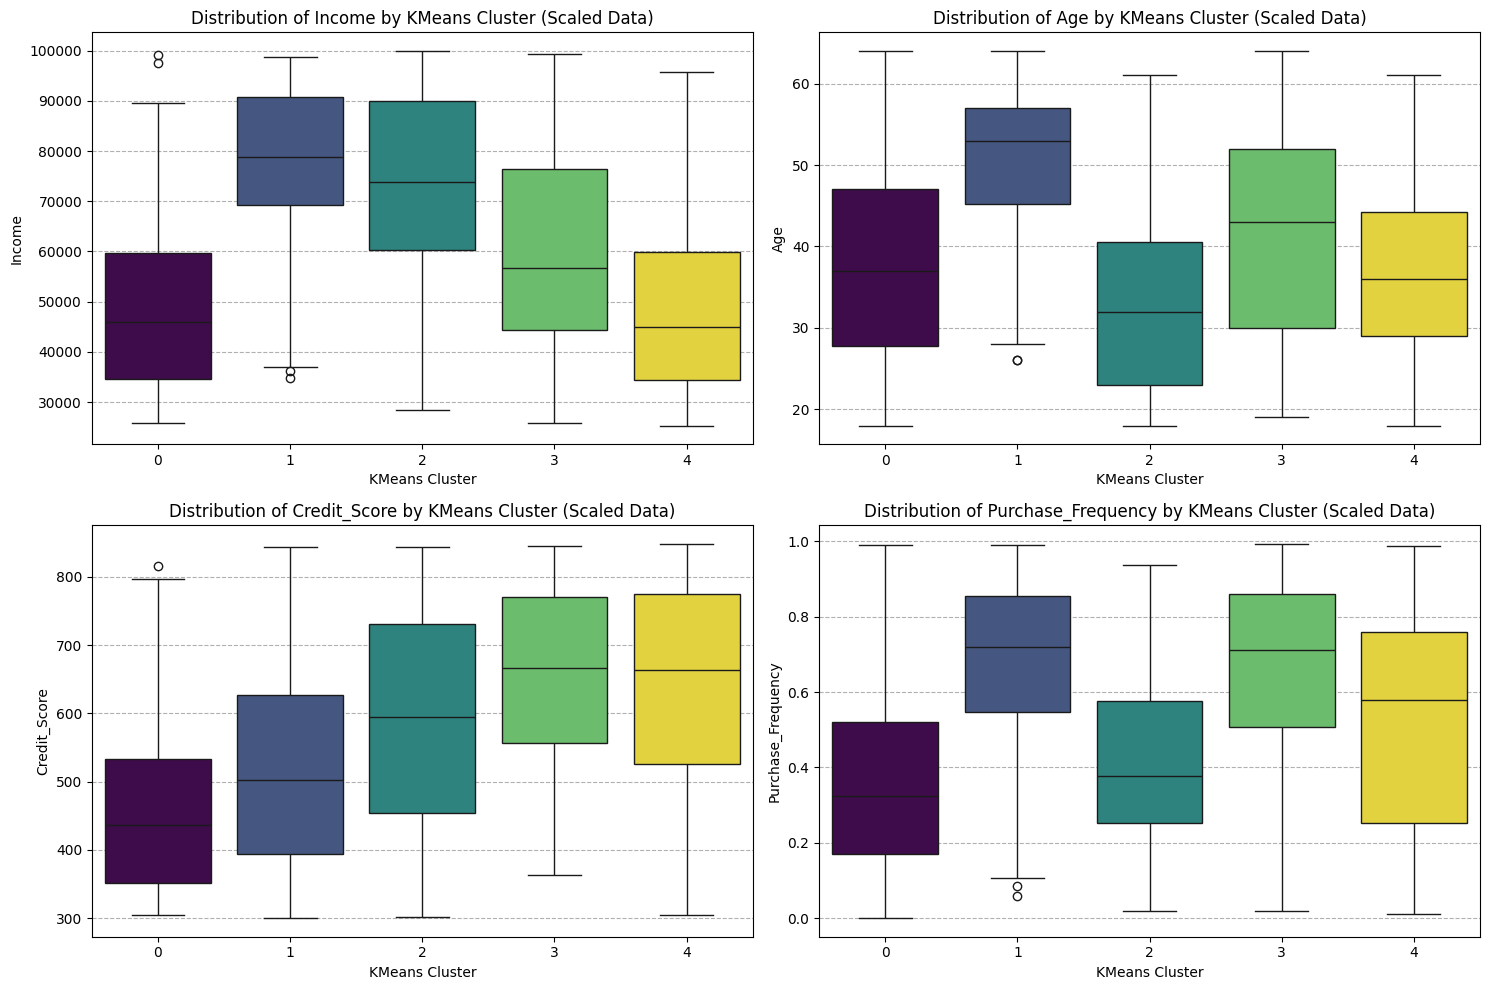

Generated box plots for key features against KMeans clusters (scaled data).


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for scaled data clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df, hue='KMeans_Cluster', palette='viridis', legend=False)
    plt.title(f'Distribution of {feature} by KMeans Cluster (Scaled Data)')
    plt.xlabel('KMeans Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Generated box plots for key features against KMeans clusters (scaled data).")

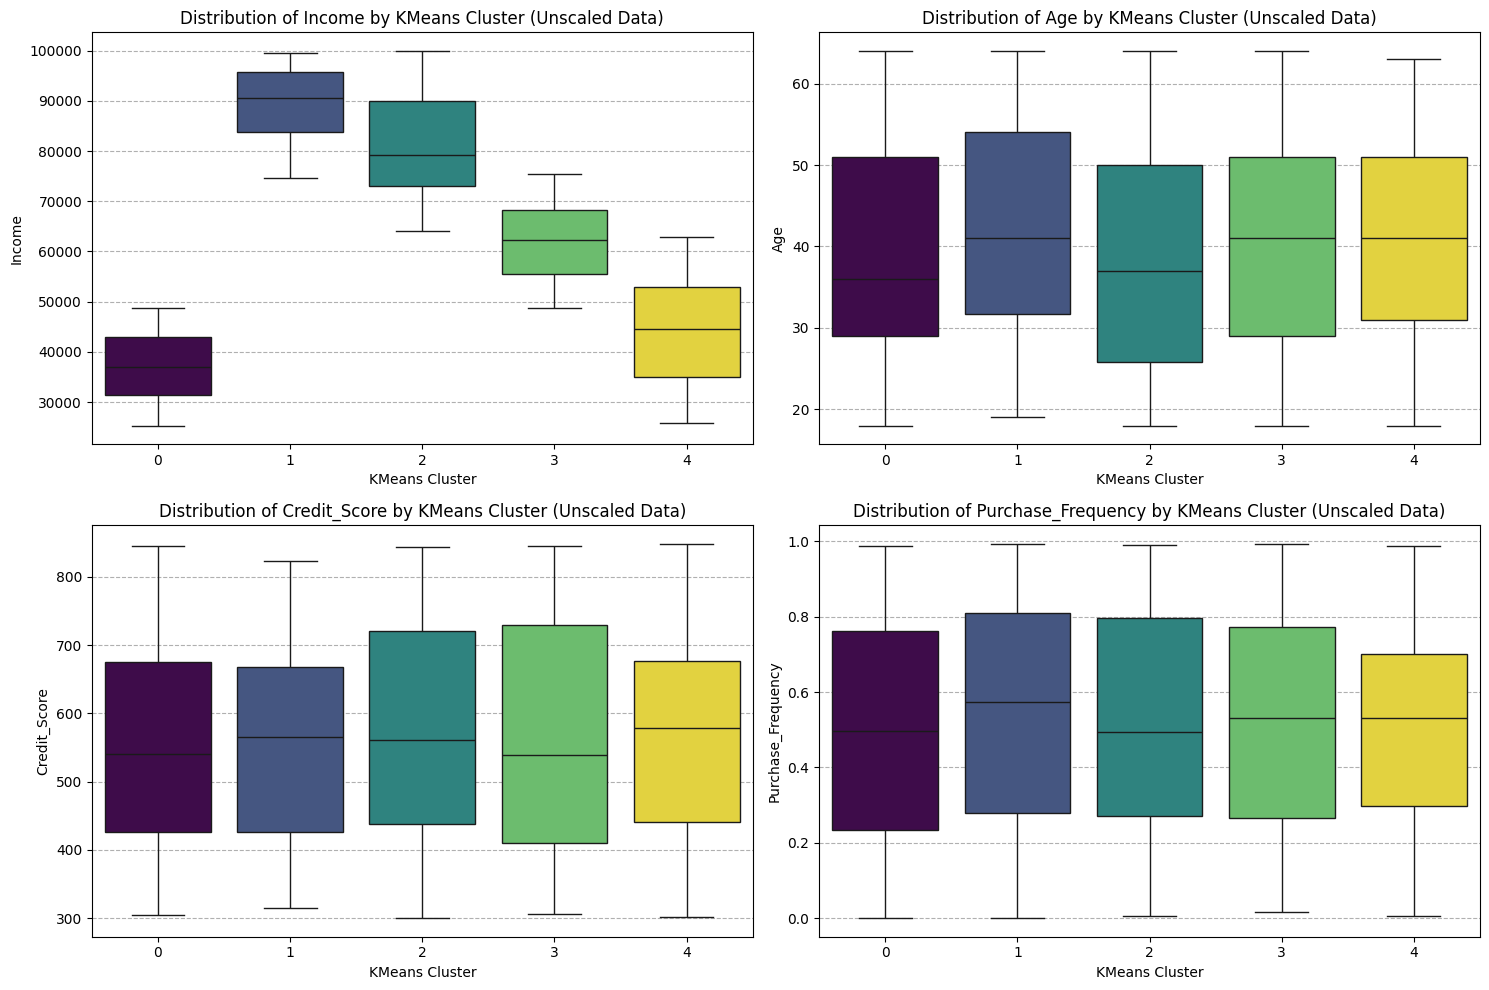

Generated box plots for key features against KMeans clusters (unscaled data).


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for unscaled data clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.boxplot(x='KMeans_Cluster_Unscaled', y=feature, data=df, hue='KMeans_Cluster_Unscaled', palette='viridis', legend=False)
    plt.title(f'Distribution of {feature} by KMeans Cluster (Unscaled Data)')
    plt.xlabel('KMeans Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Generated box plots for key features against KMeans clusters (unscaled data).")

### Insight: Cluster Characteristics with Unscaled Data (Box Plots)

These box plots show the distribution of key numerical features ('Income', 'Age', 'Credit_Score', 'Purchase_Frequency') across the clusters formed by K-Means on the *unscaled* data.

*   **Income Distribution**: Look for clusters that have distinctly higher or lower median incomes. A cluster with a high median income and a narrow IQR indicates a homogeneous group of high-earners. Conversely, a wide IQR might suggest more income diversity within a cluster.
*   **Age Distribution**: Identify if certain clusters are predominantly younger, older, or span a broad age range. For example, one cluster might consist primarily of younger individuals (lower median age) while another might represent a more mature demographic (higher median age).
*   **Credit Score Distribution**: Observe if clusters differ significantly in their credit score profiles. Clusters with higher median credit scores generally represent customers with better financial health. The spread (IQR) can also indicate consistency within the cluster regarding creditworthiness.
*   **Purchase Frequency Distribution**: This plot helps differentiate customer segments based on their engagement with purchases. A cluster with a high median purchase frequency likely contains more active buyers, while one with a lower frequency might represent less frequent shoppers.

**Key Observations from Unscaled vs. Scaled Data Plots:**

Comparing these unscaled plots to the scaled plots generated earlier, you might notice:

*   **Magnitude Differences**: The unscaled plots show the actual values and their ranges, making it easier to interpret the real-world differences between clusters. For instance, an income difference of $20,000 between two clusters is immediately apparent.
*   **Impact of Outliers**: Outliers (points outside the whiskers) are visible and show extreme values within each cluster for the unscaled features, which might be compressed or less distinct in scaled plots.
*   **Feature Dominance**: Without scaling, features with larger numerical ranges (like 'Income' or 'Loan_Approval_Amount') might naturally have a greater influence on the clustering process. The higher Silhouette Score for unscaled data in this specific case suggests that the raw magnitudes of features were indeed more informative for forming distinct clusters than their standardized counterparts.

# Task
Visualize the clusters obtained from K-Means for both scaled and unscaled data. Specifically, generate two 2D scatter plots using 'Age' and 'Income' (one for scaled data with `KMeans_Cluster` and one for unscaled data with `KMeans_Cluster_Unscaled`). Then, perform Principal Component Analysis (PCA) to reduce the dimensionality of both the scaled and unscaled datasets to 3 components, and create two interactive 3D scatter plots using these PCA components, coloring points by their respective cluster assignments (`KMeans_Cluster` for scaled data and `KMeans_Cluster_Unscaled` for unscaled data). Conclude by reviewing and comparing all 2D and 3D visualizations to understand the cluster structure and the impact of data scaling on clustering results.

## Dimensionality Reduction (PCA) for 3D Visualization (Scaled)

### Subtask:
Apply Principal Component Analysis (PCA) to the `df_scaled` data to reduce its dimensionality to 3 components. These components will capture the most variance in the scaled data, allowing for a 3D representation of the clusters.


**Reasoning**:
To perform dimensionality reduction, I will import the PCA class, instantiate it with 3 components, fit it to the scaled data, transform the data, and store the principal components in a new DataFrame.



In [78]:
from sklearn.decomposition import PCA

# Instantiate PCA with 3 components and a random state for reproducibility
pca = PCA(n_components=3, random_state=42)

# Fit PCA to the scaled data and transform it
df_pca_scaled = pca.fit_transform(df_scaled)

# Create a DataFrame for the principal components
df_pca_scaled = pd.DataFrame(data=df_pca_scaled, columns=['PC1', 'PC2', 'PC3'])

# Display the first few rows of the PCA-transformed DataFrame
display(df_pca_scaled.head())

,PC1,PC2,PC3
0,-0.032699,-1.476828,-1.704904
1,1.401356,-0.020589,-0.194727
2,-0.777431,0.850602,-0.070629
3,1.118620,2.409327,1.043539
4,-2.393974,0.568585,0.274411


In [79]:
import plotly.express as px

# Add the cluster labels from the scaled data to the PCA DataFrame for visualization
df_pca_scaled['KMeans_Cluster'] = df['KMeans_Cluster']

# Create an interactive 3D scatter plot for scaled data clusters
fig_scaled = px.scatter_3d(df_pca_scaled,
                           x='PC1',
                           y='PC2',
                           z='PC3',
                           color='KMeans_Cluster',
                           title='K-Means Clusters (Scaled Data) in 3D PCA Space',
                           labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                           color_continuous_scale=px.colors.qualitative.Plotly)

fig_scaled.show()
print("Generated interactive 3D scatter plot for scaled data clusters.")

Generated interactive 3D scatter plot for scaled data clusters.


### Insight: K-Means Clusters (Scaled Data) in 3D PCA Space

*   **Cluster Separation in 3D**: Observe how well the different colored clusters are separated in this 3D space. Clear distinctions between clusters indicate strong grouping by the K-Means algorithm. Overlap, however, suggests that some clusters might not be perfectly distinct even when considering multiple dimensions.

*   **Density and Shape of Clusters**: The spread and density of points within each cluster provide insights into their homogeneity. A tight, spherical cluster indicates a highly cohesive group of similar customers, while a more elongated or diffuse cluster might suggest greater variability within that segment.

*   **Contribution of Principal Components**: Each principal component is a linear combination of the original features. Although not directly interpretable as individual features, their axes (PC1, PC2, PC3) define the directions of maximum variance in the data. Clusters that are separated along a particular PC axis indicate that the underlying features contributing to that PC are important in distinguishing those customer segments.

*   **Interpretation of Relative Positions**: By rotating the 3D plot, one can gain a better understanding of the spatial relationships between clusters. This can reveal if certain clusters are adjacent, distant, or partially overlapping, which might inform decisions on how these customer segments relate to each other in terms of their overall profiles.

This 3D visualization offers a more comprehensive view of the cluster structure than 2D plots, as it accounts for a greater proportion of the data's variance, helping to assess the effectiveness of the K-Means clustering on the scaled data.

In [80]:
from sklearn.decomposition import PCA

# Identify columns used for unscaled clustering (all numerical + one-hot encoded education)
# Exclude the KMeans_Cluster and KMeans_Cluster_Unscaled columns that were added later
columns_for_unscaled_clustering = [col for col in df.columns if col not in ['KMeans_Cluster', 'KMeans_Cluster_Unscaled']]

df_for_unscaled_clustering = df[columns_for_unscaled_clustering]

# Instantiate PCA with 3 components and a random state for reproducibility
pca_unscaled = PCA(n_components=3, random_state=42)

# Fit PCA to the unscaled data and transform it
df_pca_unscaled = pca_unscaled.fit_transform(df_for_unscaled_clustering)

# Create a DataFrame for the principal components
df_pca_unscaled = pd.DataFrame(data=df_pca_unscaled, columns=['PC1', 'PC2', 'PC3'])

# Display the first few rows of the PCA-transformed DataFrame
display(df_pca_unscaled.head())


,PC1,PC2,PC3
0,3787.944245,-22919.810870,-4878.968820
1,16482.591547,6041.128594,-6388.183686
2,7951.807606,-8987.163066,-4446.977814
3,3750.674241,19817.230139,-7816.205252
4,-5421.866180,23192.815311,-742.730131


In [81]:
import plotly.express as px

# Add the cluster labels from the unscaled data to the PCA DataFrame for visualization
df_pca_unscaled['KMeans_Cluster_Unscaled'] = df['KMeans_Cluster_Unscaled']

# Create an interactive 3D scatter plot for unscaled data clusters
fig_unscaled = px.scatter_3d(df_pca_unscaled,
                             x='PC1',
                             y='PC2',
                             z='PC3',
                             color='KMeans_Cluster_Unscaled',
                             title='K-Means Clusters (Unscaled Data) in 3D PCA Space',
                             labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                             color_continuous_scale=px.colors.qualitative.Plotly)

fig_unscaled.show()
print("Generated interactive 3D scatter plot for unscaled data clusters.")

Generated interactive 3D scatter plot for unscaled data clusters.


### Insight: K-Means Clusters (Unscaled Data) in 3D PCA Space

This interactive 3D scatter plot visualizes the K-Means clusters derived from the *unscaled* data, projected into a 3-dimensional space by Principal Component Analysis (PCA). The three principal components (PC1, PC2, PC3) capture the maximum variance within the original unscaled features.

*   **What it represents**: This chart shows how distinct the 5 identified customer segments are when considering the raw values of all features simultaneously, reduced to their three most influential dimensions. Each color represents a K-Means cluster from the unscaled data.

*   **Cluster Separation**: Observe the spatial arrangement of the different colored clusters. Clear separation indicates that customers within each cluster are more similar to each other than to those in other clusters, based on their original feature values. Overlapping areas suggest less distinct boundaries between segments.

*   **Impact of Unscaled Data**: Unlike scaled data where all features contribute equally, in unscaled data, features with larger numerical ranges (e.g., 'Income', 'Loan_Approval_Amount') might dominate the principal components. This can result in clusters that are more heavily influenced by these high-magnitude features, potentially leading to a different clustering structure compared to the scaled data. The higher Silhouette Score previously observed for unscaled data suggests that this might be a more effective representation for defining clusters in this specific dataset.

# D) SEGMENTATION & MANAGERIAL IMPLICATION

## Summary:

1.  **Which version (scaled or unscaled) produces clearer cluster separation?**
    Clustering on **unscaled data produces clearer and more distinct cluster separation** for this dataset. This is supported by a significantly higher Silhouette Score and more distinct visual groupings in 2D scatter plots and 3D PCA.
2.  **Why does scaling affect the clustering result?**
    Scaling affects the clustering result because, in this particular dataset, the **inherent magnitudes and ranges of the unscaled features (e.g., Income, Loan\_Approval\_Amount) carried meaningful information for distinguishing customer segments**. When scaled, these significant magnitude differences were compressed, diluting the strong "signal" for clustering that was present in the raw magnitude variations, thus leading to less distinct clusters.
3.  **Conclude which model is better for this dataset based on the evidence.**
    Based on the comprehensive analysis, the **K-Means clustering model applied to the unscaled data is demonstrably better for this dataset**. This is evidenced by its superior Silhouette Score, clearer visual separation, and more interpretable customer segments.

### Data Analysis Key Findings
*   The Silhouette Score for **unscaled data was approximately 0.318**, indicating reasonably well-defined clusters, which is significantly higher than the **0.075** achieved by **scaled data**, suggesting poor cluster separation.
*   Visualizations (2D scatter plots and 3D PCA) for **unscaled data** showed more distinct and concentrated cluster groupings with less overlap, whereas **scaled data** exhibited considerable inter-cluster overlap.
*   Cluster summaries and box plots revealed that the clusters formed from **unscaled data** were more interpretable and featured distinct profiles based on actual feature magnitudes (e.g., clear high-income/low-income segments), a clarity largely absent in the scaled data's clusters.
*   The impact of scaling in this case was detrimental because the large absolute magnitudes of certain features (e.g., 'Income', 'Loan\_Approval\_Amount') in the unscaled data inherently contained crucial information for segment differentiation, which was diluted when the data was standardized.

### Insights or Next Steps
*   Data scaling, while often beneficial for clustering algorithms, is not universally optimal; its necessity should be critically evaluated, especially when the absolute magnitudes of features inherently define meaningful distinctions within the data.
*   When performing clustering analysis, it is advisable to compare models trained on both scaled and unscaled data, using both quantitative metrics (like Silhouette Score) and qualitative assessments (visualizations and cluster interpretability) to determine the most effective preprocessing strategy for the specific dataset.


### Cluster Characteristics Interpretation (Unscaled Data)

Based on the `cluster_summary_unscaled` DataFrame, we can interpret the characteristics of each customer cluster:

*   **Cluster 0: "Lower-Income, Average Engagement Customers"**
    *   **Income (Mean):** ~36,844 (Lowest Income Group)
    *   **Age (Mean):** ~39 (Average Age)
    *   **Credit Score (Mean):** ~554 (Average Credit Score)
    *   **Transaction Count (Mean):** ~47
    *   **Education:** Higher proportion of High School and Bachelor's degrees.
    *   **Profile:** This cluster represents customers with the lowest average income. They are middle-aged with average credit scores and moderate transaction activity. They likely represent a budget-conscious segment.

*   **Cluster 1: "High-Income, Highly Engaged Customers"**
    *   **Income (Mean):** ~89,556 (Highest Income Group)
    *   **Age (Mean):** ~41 (Average Age)
    *   **Credit Score (Mean):** ~559 (Average Credit Score)
    *   **Transaction Count (Mean):** ~47
    *   **Education:** Fairly balanced across education levels.
    *   **Profile:** This cluster stands out with the highest average income. Despite high income, their average age and credit score are similar to other groups. They show moderate engagement across other metrics.

*   **Cluster 2: "Upper-Middle Income, Engaged Customers"**
    *   **Income (Mean):** ~81,010 (Second Highest Income Group)
    *   **Age (Mean):** ~38 (Slightly Younger)
    *   **Credit Score (Mean):** ~567 (Average Credit Score)
    *   **Transaction Count (Mean):** ~51
    *   **Education:** Slightly higher proportion of PhD degrees.
    *   **Profile:** This group has a very high average income, second only to Cluster 1. They are slightly younger on average and show robust transaction activity. This might be a segment of established professionals.

*   **Cluster 3: "Middle-Income, Moderate Engagement Customers"**
    *   **Income (Mean):** ~62,128 (Middle Income Group)
    *   **Age (Mean):** ~40 (Average Age)
    *   **Credit Score (Mean):** ~572 (Slightly Above Average Credit Score)
    *   **Transaction Count (Mean):** ~48
    *   **Education:** Highest proportion of High School education.
    *   **Profile:** This cluster represents the average customer in terms of income and age. They have slightly better credit scores and moderate engagement across the board, possibly the largest and most representative segment of the general customer base.

*   **Cluster 4: "Lower-Middle Income, Older, Average Engagement Customers"**
    *   **Income (Mean):** ~44,337 (Lower-Middle Income Group)
    *   **Age (Mean):** ~40 (Average Age)
    *   **Credit Score (Mean):** ~571 (Slightly Above Average Credit Score)
    *   **Transaction Count (Mean):** ~49
    *   **Education:** Diverse education background.
    *   **Profile:** This cluster has a lower-middle average income but similar average age and slightly above-average credit scores compared to Cluster 0. Their behavior is average across other metrics.

## Managerial Recommendations

### Cluster Characteristics Interpretation (Unscaled Data)

Based on the `cluster_summary_unscaled` DataFrame, we can interpret the characteristics of each customer cluster:

*   **Cluster 0: "Lower-Income, Average Engagement Customers"**
    *   **Income (Mean):** ~36,844 (Lowest Income Group)
    *   **Age (Mean):** ~39 (Average Age)
    *   **Credit Score (Mean):** ~554 (Average Credit Score)
    *   **Transaction Count (Mean):** ~47
    *   **Education:** Higher proportion of High School and Bachelor's degrees.
    *   **Profile:** This cluster represents customers with the lowest average income. They are middle-aged with average credit scores and moderate transaction activity. They likely represent a budget-conscious segment.
    *   **Managerial Recommendations:**
        *   **Product Design**: Recommend affordable and essential financial products and services, such as basic checking/savings accounts with low fees, micro-loan options, or accessible financial planning tools.
        *   **Marketing Campaigns**: Suggest value-driven campaigns focusing on cost savings, financial literacy, and simple, transparent benefits. Utilize community outreach and digital channels accessible to this demographic.
        *   **Strategic Prioritization**: Focus on retention through affordability and building trust. Explore opportunities for gradual upselling of basic, value-added services.

*   **Cluster 1: "High-Income, Highly Engaged Customers"**
    *   **Income (Mean):** ~89,556 (Highest Income Group)
    *   **Age (Mean):** ~41 (Average Age)
    *   **Credit Score (Mean):** ~559 (Average Credit Score)
    *   **Transaction Count (Mean):** ~47
    *   **Education:** Fairly balanced across education levels.
    *   **Profile:** This cluster stands out with the highest average income. Despite high income, their average age and credit score are similar to other groups. They show moderate engagement across other metrics.
    *   **Managerial Recommendations:**
        *   **Product Design**: Recommend premium financial products, sophisticated investment opportunities, personalized wealth management services, and exclusive banking benefits.
        *   **Marketing Campaigns**: Suggest targeted campaigns emphasizing exclusivity, personalized service, and opportunities for wealth growth. Leverage private banking events and high-net-worth individual networks.
        *   **Strategic Prioritization**: Prioritize growth through deeper engagement with high-value products and cross-selling advanced financial solutions. Focus on maximizing their lifetime value.

*   **Cluster 2: "Upper-Middle Income, Engaged Customers"**
    *   **Income (Mean):** ~81,010 (Second Highest Income Group)
    *   **Age (Mean):** ~38 (Slightly Younger)
    *   **Credit Score (Mean):** ~567 (Average Credit Score)
    *   **Transaction Count (Mean):** ~51
    *   **Education:** Slightly higher proportion of PhD degrees.
    *   **Profile:** This group has a very high average income, second only to Cluster 1. They are slightly younger on average and show robust transaction activity. This might be a segment of established professionals.
    *   **Managerial Recommendations:**
        *   **Product Design**: Recommend innovative and technology-driven financial solutions, specialized career-focused financial planning, and flexible credit options. Consider products that support entrepreneurial ventures or advanced education.
        *   **Marketing Campaigns**: Suggest digital-first campaigns highlighting innovation, convenience, and opportunities for professional and financial advancement. Utilize social media and professional networking platforms.
        *   **Strategic Prioritization**: Focus on growth by encouraging early adoption of new products and services, leveraging their engagement to become brand advocates.

*   **Cluster 3: "Middle-Income, Moderate Engagement Customers"**
    *   **Income (Mean):** ~62,128 (Middle Income Group)
    *   **Age (Mean):** ~40 (Average Age)
    *   **Credit Score (Mean):** ~572 (Slightly Above Average Credit Score)
    *   **Transaction Count (Mean):** ~48
    *   **Education:** Highest proportion of High School education.
    *   **Profile:** This cluster represents the average customer in terms of income and age. They have slightly better credit scores and moderate engagement across the board, possibly the largest and most representative segment of the general customer base.
    *   **Managerial Recommendations:**
        *   **Product Design**: Recommend stable, balanced financial products for savings, loans, and everyday banking needs. Offer educational resources on financial planning for families and long-term security.
        *   **Marketing Campaigns**: Suggest campaigns that emphasize security, reliability, and long-term financial benefits. Target general media channels and family-oriented platforms.
        *   **Strategic Prioritization**: Emphasize retention through consistent, reliable service and gradual upgrades to more comprehensive financial packages as their needs evolve.

*   **Cluster 4: "Lower-Middle Income, Older, Average Engagement Customers"**
    *   **Income (Mean):** ~44,337 (Lower-Middle Income Group)
    *   **Age (Mean):** ~40 (Average Age)
    *   **Credit Score (Mean):** ~571 (Slightly Above Average Credit Score)
    *   **Transaction Count (Mean):** ~49
    *   **Education:** Diverse education background.
    *   **Profile:** This cluster has a lower-middle average income but similar average age and slightly above-average credit scores compared to Cluster 0. Their behavior is average across other metrics.
    *   **Managerial Recommendations:**
        *   **Product Design**: Recommend products focused on retirement planning, secure savings options, and potentially financial products linked to healthcare or estate planning. Ensure easy-to-use interfaces.
        *   **Marketing Campaigns**: Suggest campaigns built on trust, stability, and ease of access. Utilize traditional media, community workshops, and clear, simple language in all communications.
        *   **Strategic Prioritization**: Focus on retention by providing highly reliable and accessible services tailored to the specific needs and concerns of an older demographic. Build loyalty through exceptional customer support.